In [2]:
import pandas as pd
import numpy as np 
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

C:\Users\NoteBook\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head(n=10)

,RM,LSTAT,PTRATIO,MDEV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [5]:
data.info

<bound method DataFrame.info of         RM  LSTAT  PTRATIO      MDEV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25   5

In [6]:
data.shape

(489, 4)

In [7]:
prices =data['MDEV']
features = data.drop('MDEV', axis = 1)

In [8]:
min_price = np.min(prices)
max_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print("Statistics for Boston housing dataset: \n")
print("min price : ${}".format(min_price))
print("max price : ${}".format(max_price))
print("mean price : ${}".format(mean_price))
print("median price : ${}".format(median_price))
print("standerd diviation price : ${}".format(std_price))

Statistics for Boston housing dataset: 

min price : $105000.0
max price : $1024800.0
mean price : $454342.9447852761
median price : $438900.0
standerd diviation price : $165171.13154429477


Housing Prices vs. Features


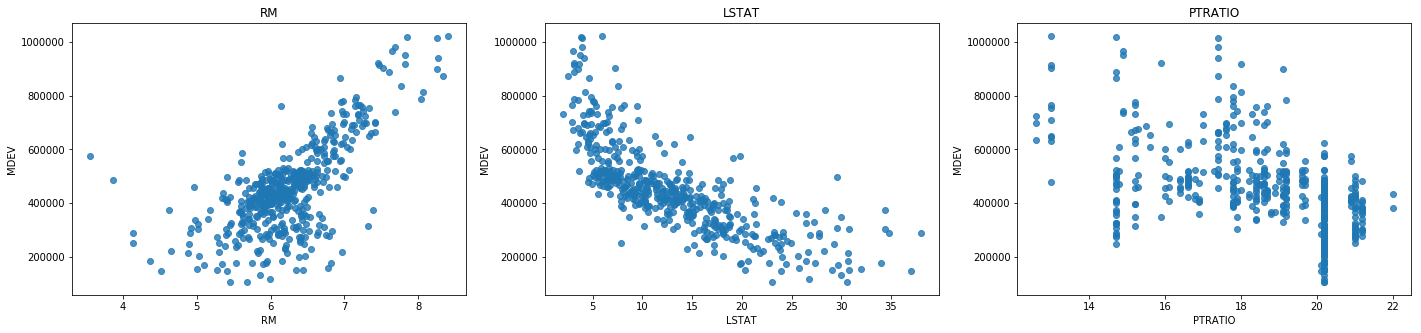

In [9]:
import seaborn as sns

features_list = ['RM', 'LSTAT', 'PTRATIO']
sub_plot = range(131, 131 + 3)

print ('Housing Prices vs. Features')
fig = plt.figure(figsize=(24, 5))
for i, feature in enumerate(features_list):
    plt.subplot(sub_plot[i])
    sns.regplot(data[features_list[i]], prices, fit_reg=False)
    plt.title(feature)
    plt.show

In [10]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [11]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [12]:
X_train, X_test,y_train,y_test = train_test_split(features, prices,test_size = 0.2, random_state = 0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

391
98
391
98


# Biuld  Model

In [13]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
def fit_model(X,y):
    cv_sets = ShuffleSplit(X.shape[0],n_iter = 10,test_size = 0.2,random_state= 0)
    regressor = DecisionTreeRegressor()
    params = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    scoring_func = make_scorer(performance_metric)
    grid = GridSearchCV(regressor, params, scoring = scoring_func)
    grid = grid.fit(X,y)
    return grid.best_estimator_

C:\Users\NoteBook\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
reg = fit_model(X_train,y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [17]:
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 14, 10]]  # Client 3
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $459,425.81


Housing Prices vs. Features


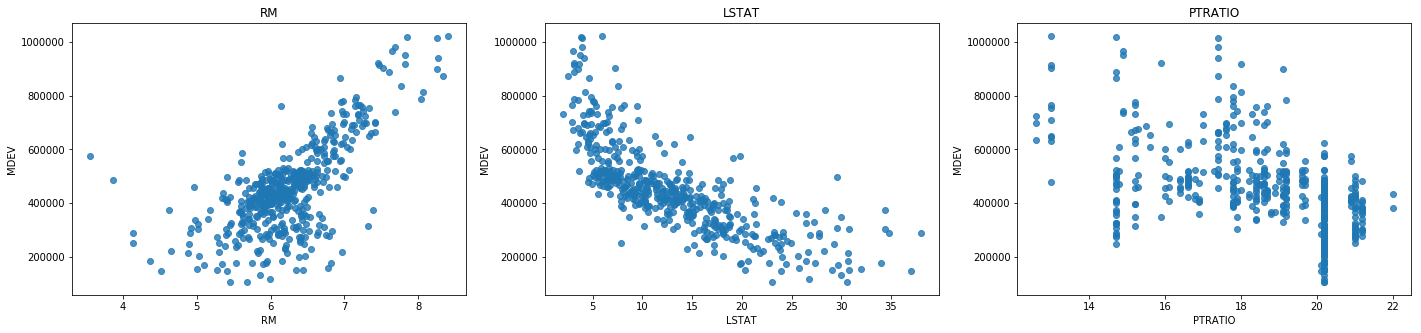

In [18]:
features_list = ['RM', 'LSTAT', 'PTRATIO']
sub_plot = range(131, 131 + 3)

print ('Housing Prices vs. Features')
fig = plt.figure(figsize=(24, 5))
for i, feature in enumerate(features_list):
    plt.subplot(sub_plot[i])
    sns.regplot(data[features_list[i]], prices, fit_reg=False)
    plt.title(feature)
    plt.show

C:\Users\NoteBook\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


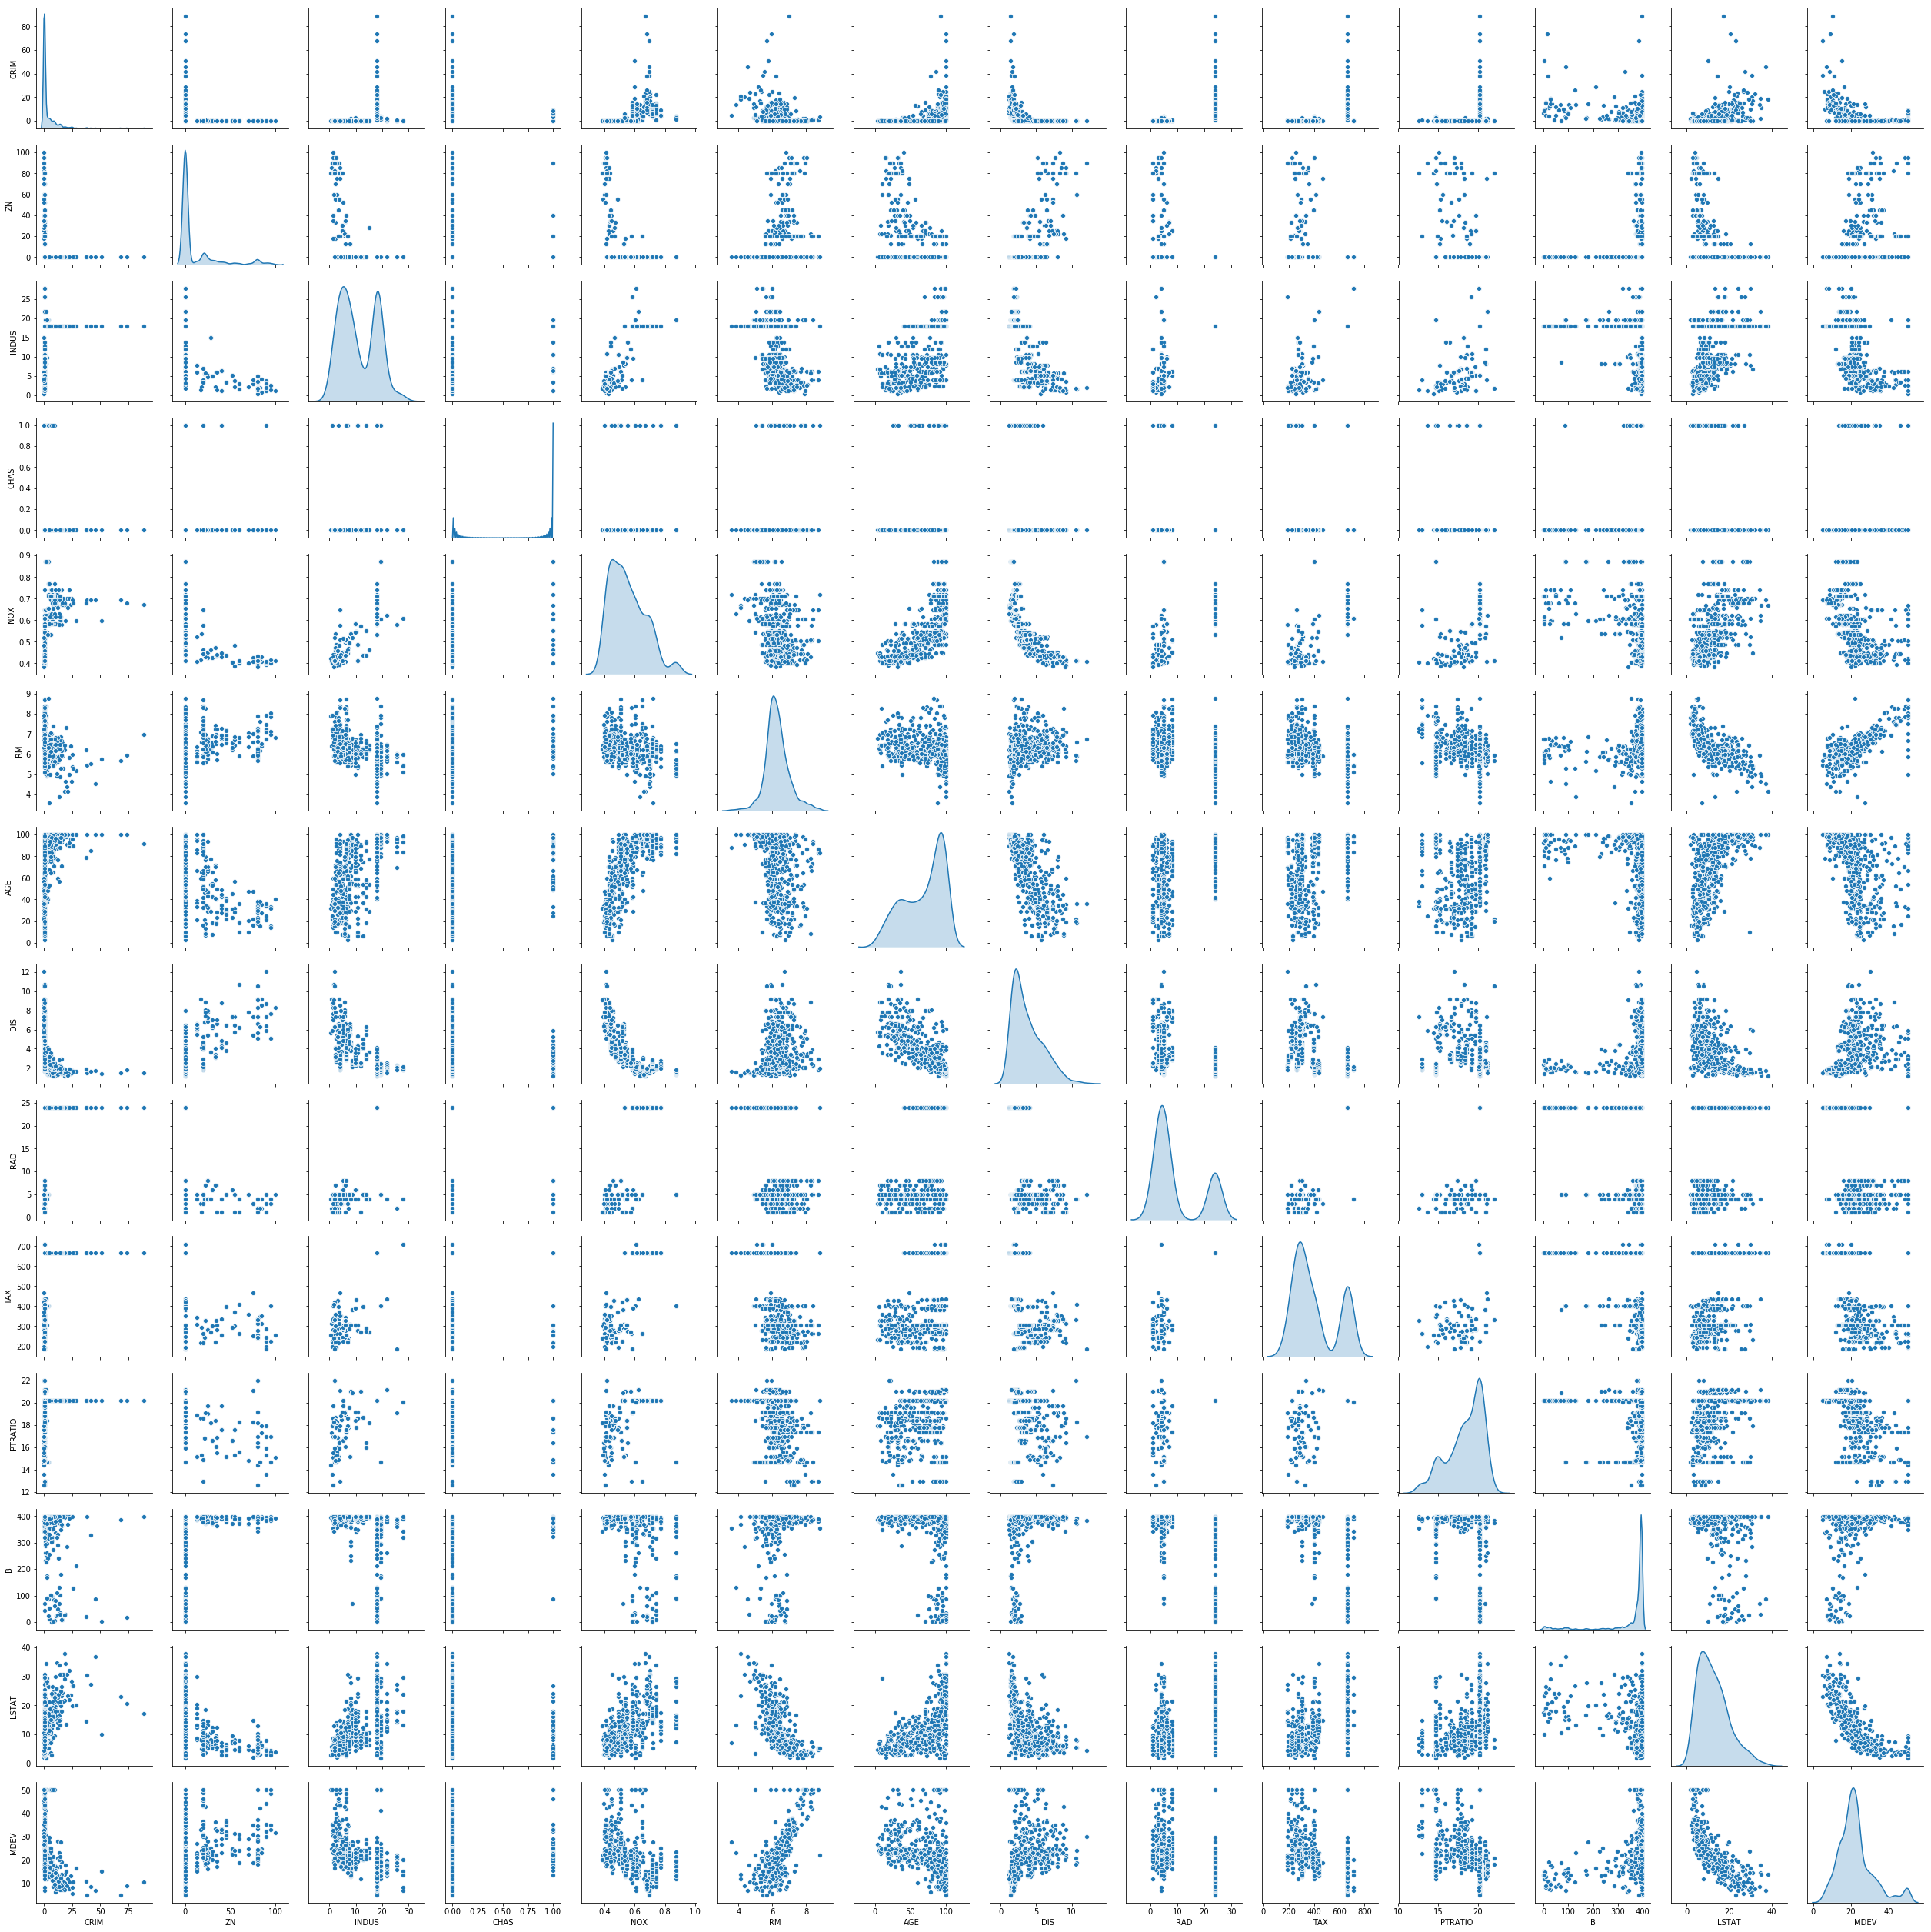

In [19]:
from sklearn.datasets import load_boston

df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
df['MDEV'] = load_boston().target

# Visualize pairwise relationships between features
sns.pairplot(df, diag_kind="kde")